In [8]:
!pip install tensorflow xgboost numpy matplotlib scikit-learn opencv-python pillow seaborn pandas setuptools openpyxl


In [9]:

# some basic libraries
import xgboost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing for basic image operations
import cv2 as cv
from PIL import Image
from PIL import ImageOps
import seaborn as sns
import pandas as pd
import os

# data structures
from collections import OrderedDict

# importing pretrained models
from tensorflow.keras.applications import efficientnet

# for splitting data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# prerequisites for training models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for selecting better metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# initialize TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Atualização aqui
except:
    strategy = tf.distribute.get_strategy()

print(f"Strategy: {strategy}")


Strategy: <tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x000001F54140BEF0>


In [10]:
# variables to change

TRAIN_IMG_DIR_PATH = "../imagens_bd/results_train"
TEST_IMG_DIR_PATH = "../imagens_bd/results_test" 
TRAIN_SC_DIR_PATH = "../imagens_bd/train-resized"
TEST_SC_DIR_PATH = "../imagens_bd/test-resized"
model_path = "../modelo"
#classes = ["residential", "mixed", "commercial","others","industrial"]
classes = ["residential", "commercial","others","industrial"]

INPUT_IMG_WIDTH = 250
INPUT_IMG_HEIGHT = 350
VERTICAL = True

In [11]:
new_eff_model = tf.keras.models.load_model(model_path + '/' + 'modelo_att_2(25e).keras')

In [12]:
new_eff_model.load_weights(model_path + '/' + 'modelo_att.weights.h5')

In [15]:
#@title
target_class = "residential"
residential_prediction_mapping = OrderedDict()

with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):

    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    residential_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "commercial"
commercial_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):
    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    commercial_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "industrial"
industrial_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):
    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    industrial_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "others"
others_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):

    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    others_prediction_mapping[file_name] = new_eff_model.predict(building_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
#@title
others_predictions = OrderedDict()

for file_name in others_prediction_mapping.keys():
  # others_predictions[file_name] = np.argmax(others_prediction_mapping[file_name], axis = 1)[0]
  others_predictions[file_name] = others_prediction_mapping[file_name]

others_scene_predictions = OrderedDict()
for file_name in others_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in others_scene_predictions.keys():
    others_scene_predictions[scene_file_name] = [others_predictions[file_name]]
  else:
    others_scene_predictions[scene_file_name].append(others_predictions[file_name])

residential_predictions = OrderedDict()
for file_name in residential_prediction_mapping.keys():
  # residential_predictions[file_name] = np.argmax(residential_prediction_mapping[file_name], axis = 1)[0]

  residential_predictions[file_name] = residential_prediction_mapping[file_name]

residential_scene_predictions = OrderedDict()
for file_name in residential_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in residential_scene_predictions.keys():
    residential_scene_predictions[scene_file_name] = [residential_predictions[file_name]]
  else:
    residential_scene_predictions[scene_file_name].append(residential_predictions[file_name])

commercial_predictions = OrderedDict()
for file_name in commercial_prediction_mapping.keys():
  # commercial_predictions[file_name] = np.argmax(commercial_prediction_mapping[file_name], axis = 1)[0]

  commercial_predictions[file_name] = commercial_prediction_mapping[file_name]
commercial_scene_predictions = OrderedDict()
for file_name in commercial_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in commercial_scene_predictions.keys():
    commercial_scene_predictions[scene_file_name] = [commercial_predictions[file_name]]
  else:
    commercial_scene_predictions[scene_file_name].append(commercial_predictions[file_name])

industrial_predictions = OrderedDict()
for file_name in industrial_prediction_mapping.keys():
  # industrial_predictions[file_name] = np.argmax(industrial_prediction_mapping[file_name], axis = 1)[0]

  industrial_predictions[file_name] = industrial_prediction_mapping[file_name]
industrial_scene_predictions = OrderedDict()
for file_name in industrial_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in industrial_scene_predictions.keys():
    industrial_scene_predictions[scene_file_name] = [industrial_predictions[file_name]]
  else:
    industrial_scene_predictions[scene_file_name].append(industrial_predictions[file_name])

 Visualizar Imagens e Previsões

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to plot a sample of the images and their predictions
def plot_sample_images(prediction_mapping, target_class, num_samples=10):
    sample_predictions = list(prediction_mapping.items())[:num_samples]
    for file_path, prediction in sample_predictions:
        # Check if the path does not start with any of the known prefixes
        print(file_path)
        if not file_path.startswith(('commercial', 'residential', 'industrial')):
            file_path = 'others/' + file_path

        img = Image.open(TEST_IMG_DIR_PATH + '/' + file_path)
        plt.imshow(img)
        plt.title(f"Prediction: {np.argmax(prediction)}")
        plt.show()


# Plot sample images and their predictions for each class
print("Residential Images and Predictions:")
plot_sample_images(residential_prediction_mapping, "residential")

print("Commercial Images and Predictions:")
plot_sample_images(commercial_prediction_mapping, "commercial")

print("Industrial Images and Predictions:")
plot_sample_images(industrial_prediction_mapping, "industrial")

print("Other Images and Predictions:")
plot_sample_images(others_prediction_mapping, "others")


Residential Images and Predictions:


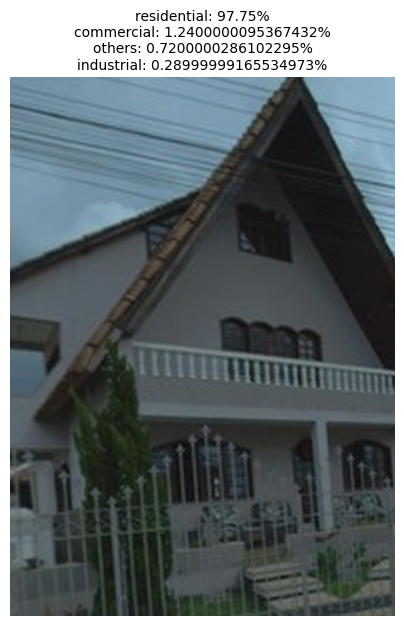

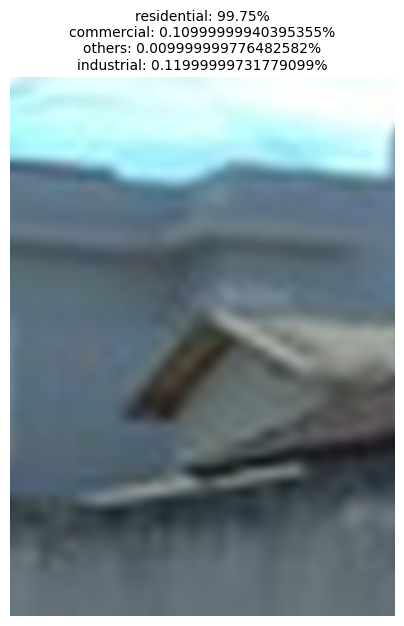

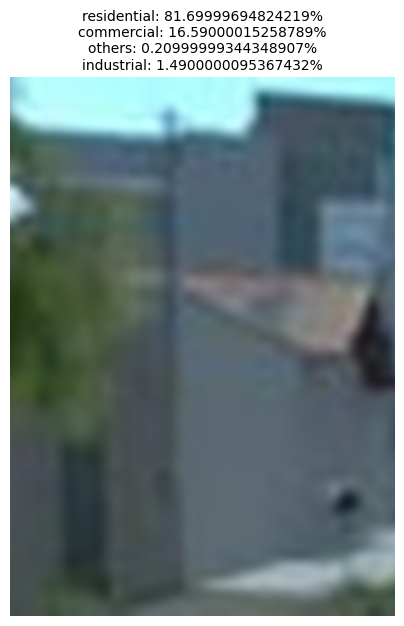

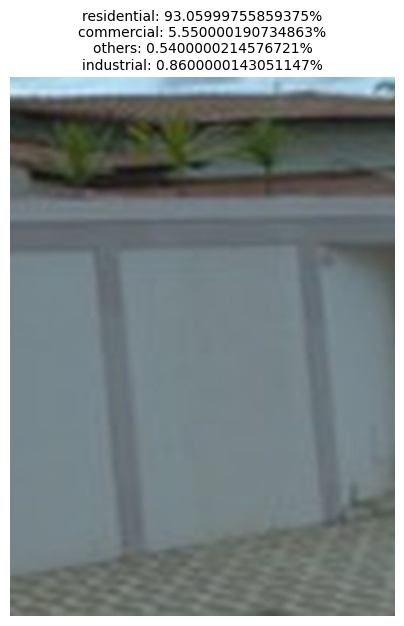

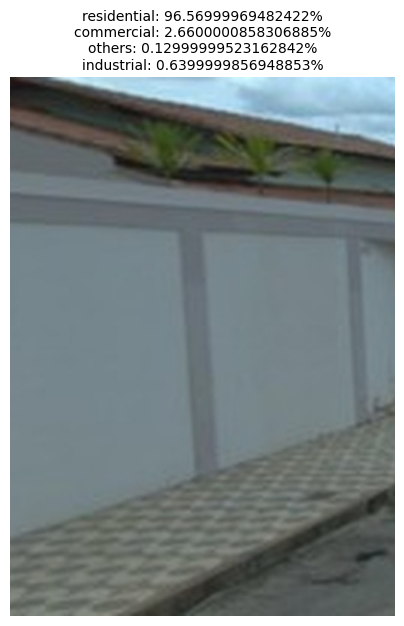

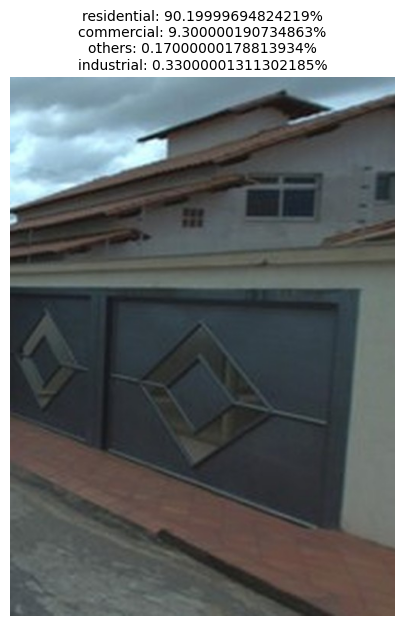

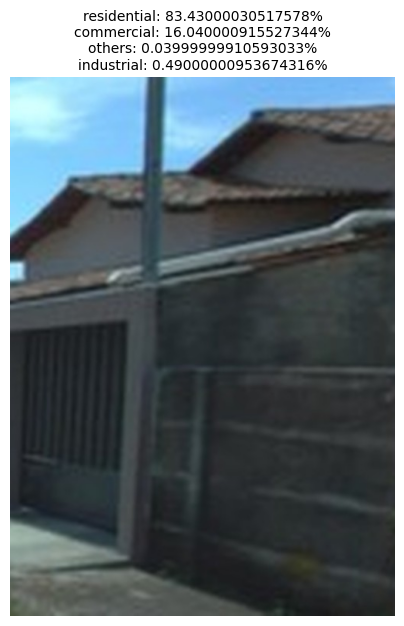

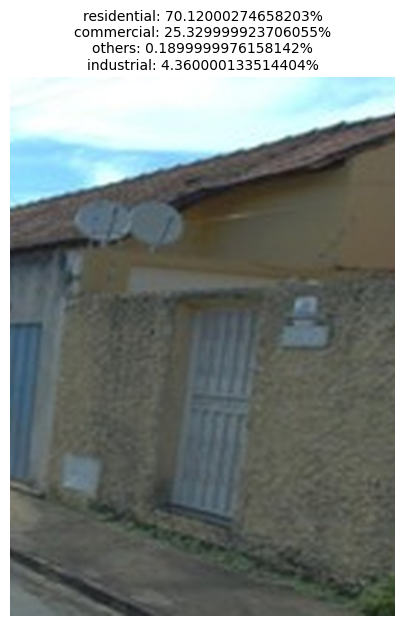

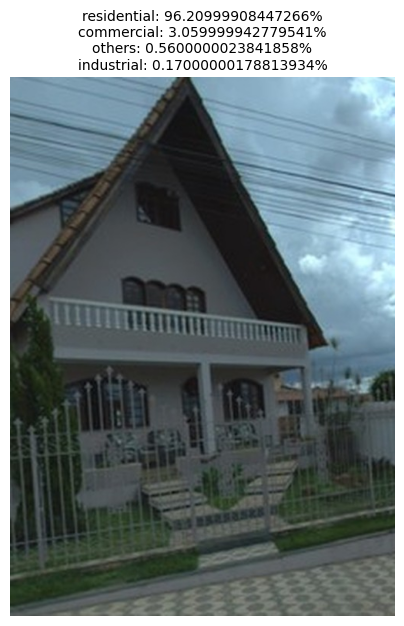

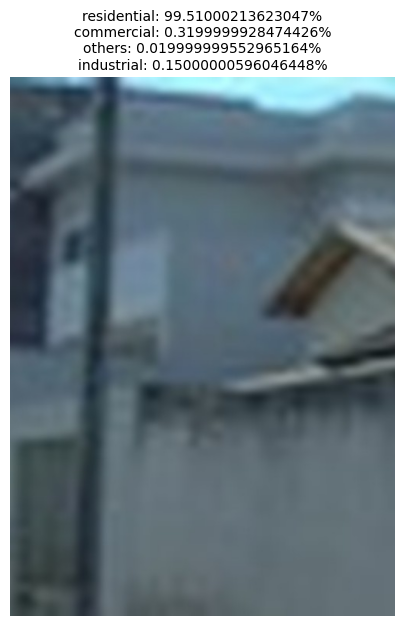

Commercial Images and Predictions:


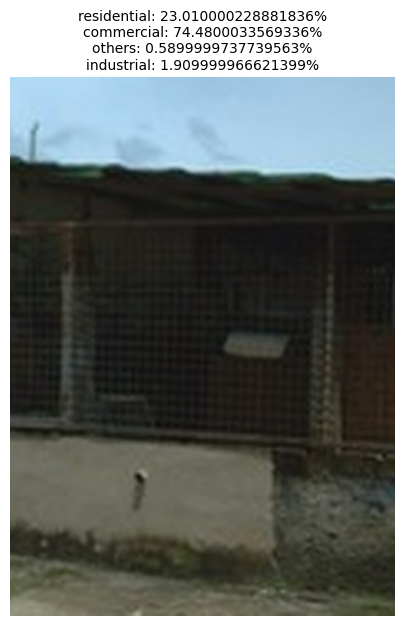

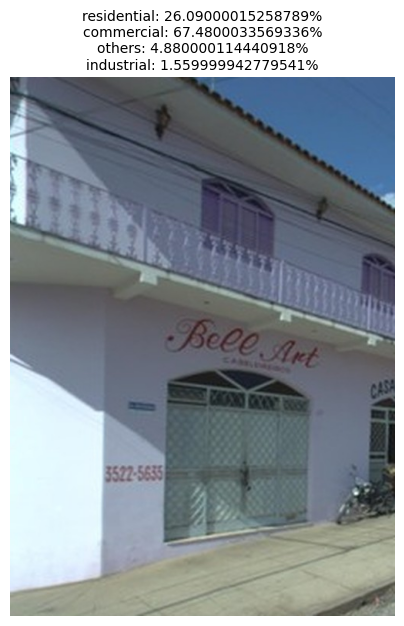

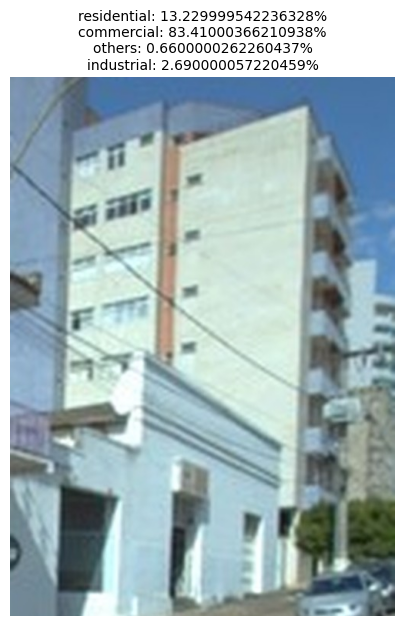

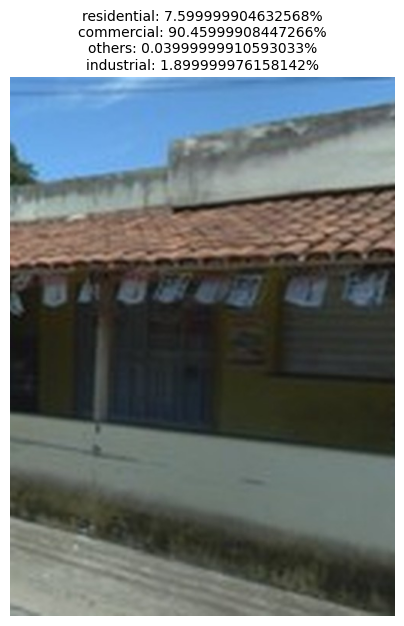

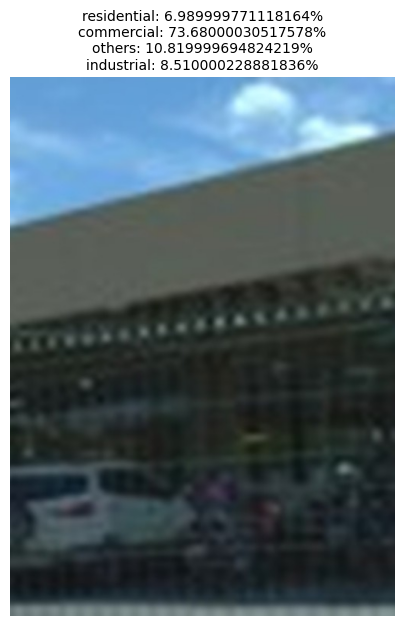

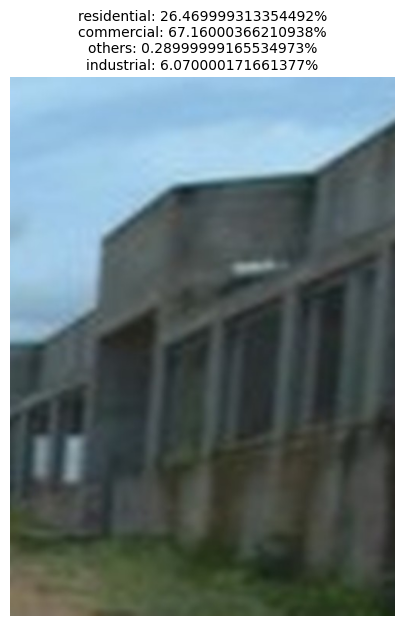

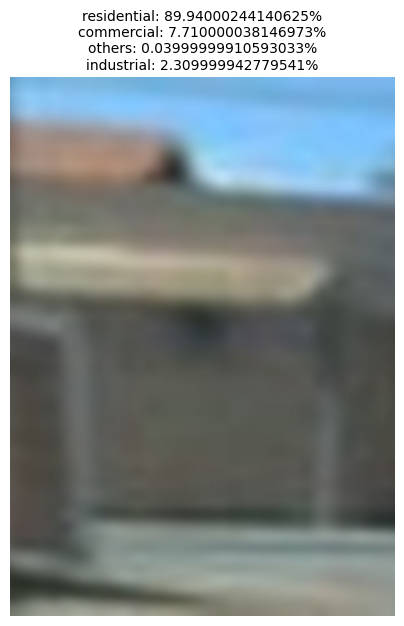

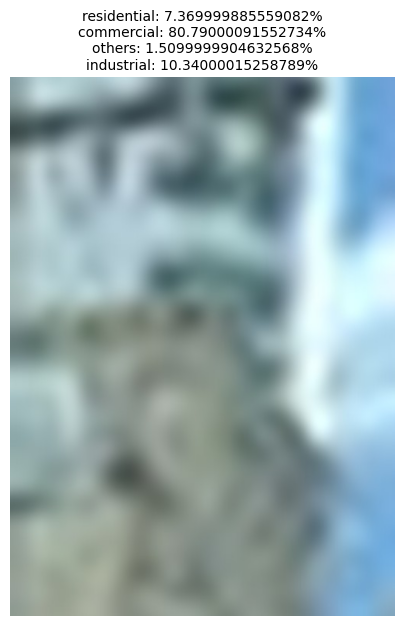

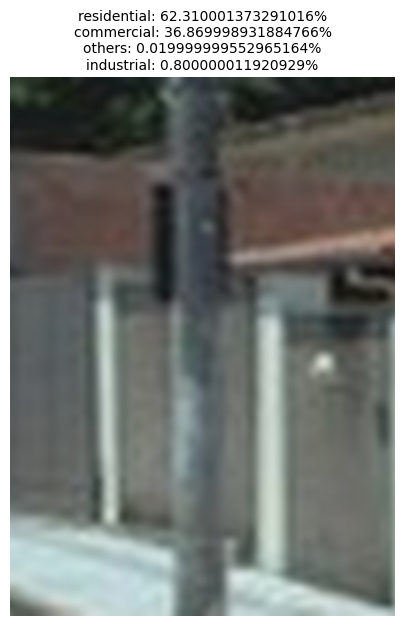

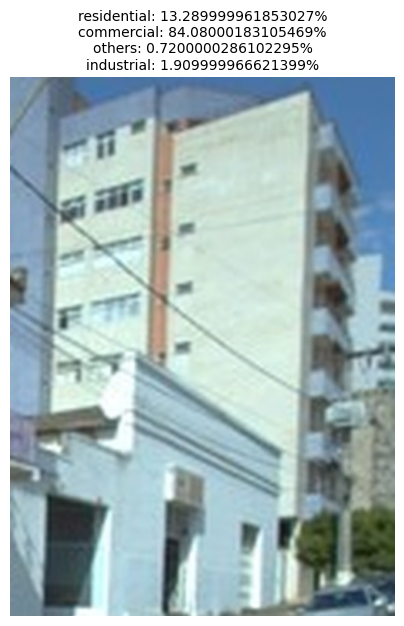

Industrial Images and Predictions:


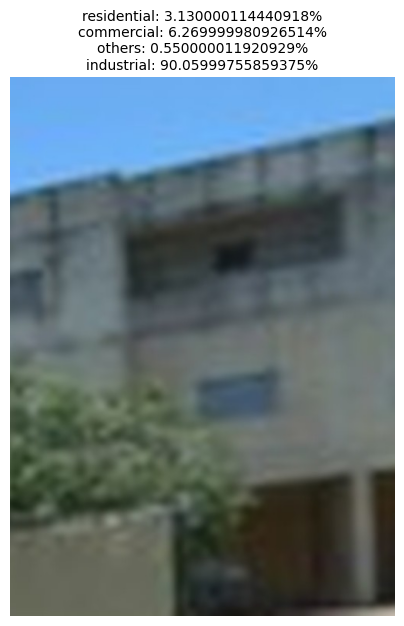

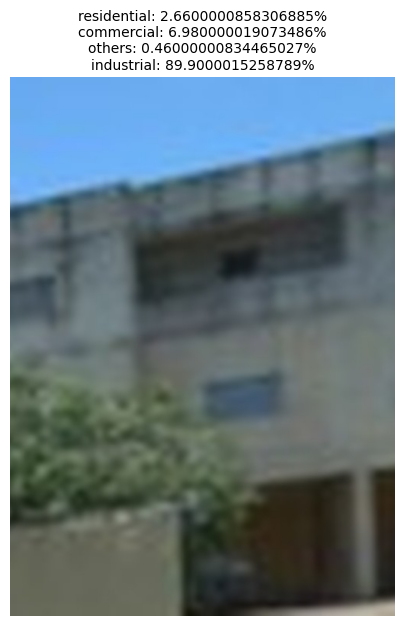

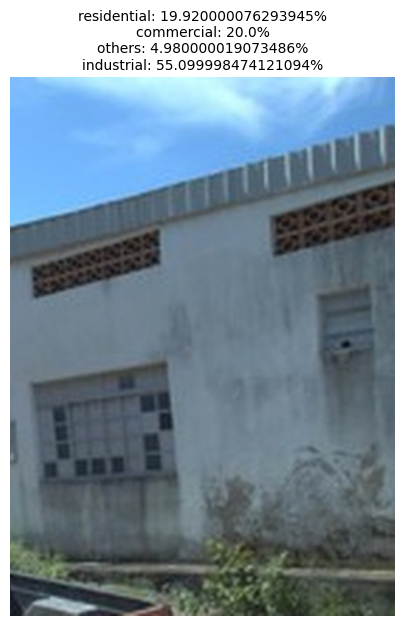

Other Images and Predictions:


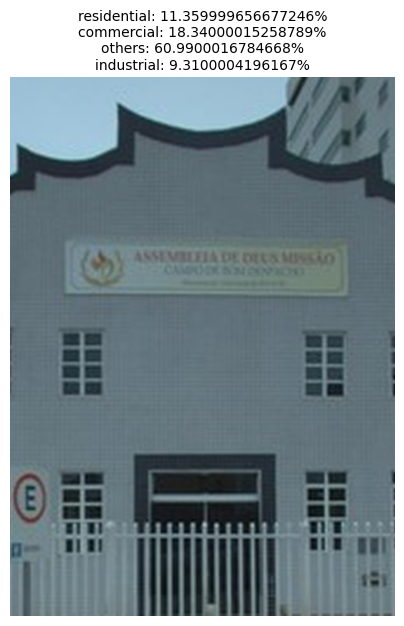

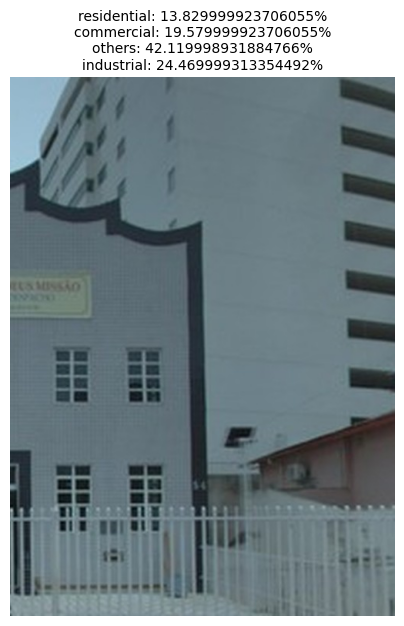

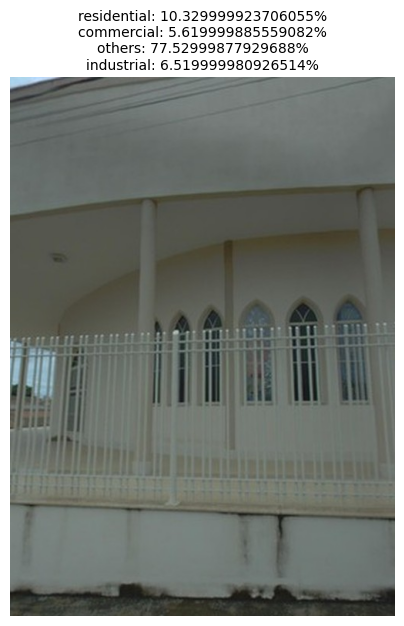

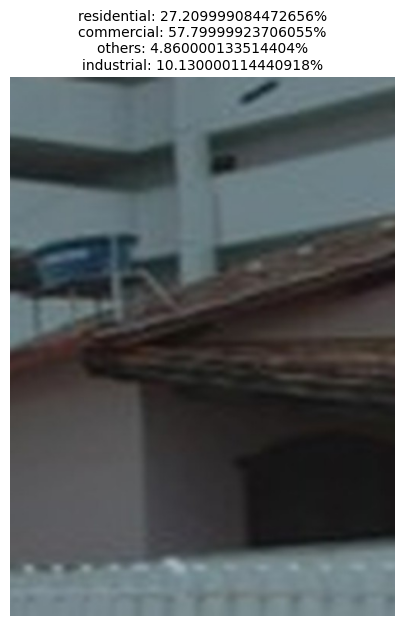

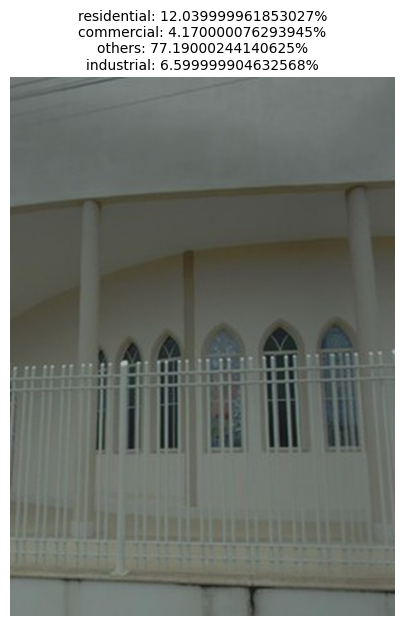

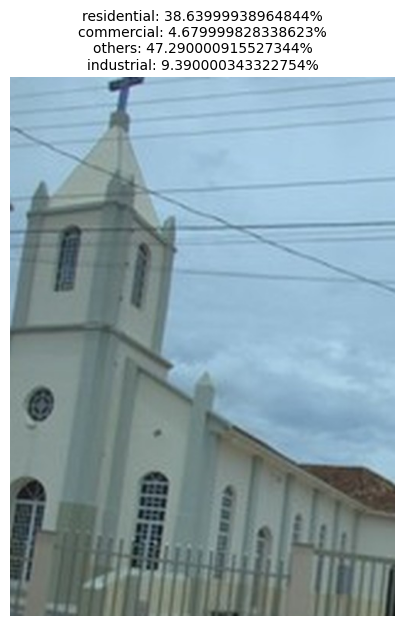

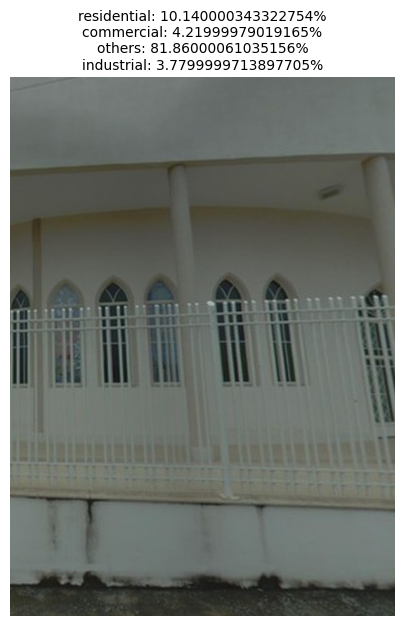

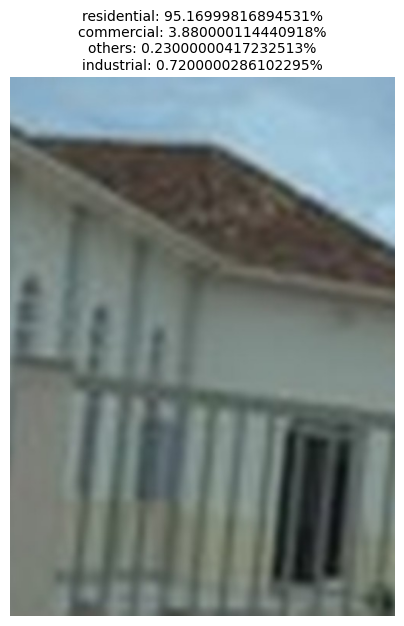

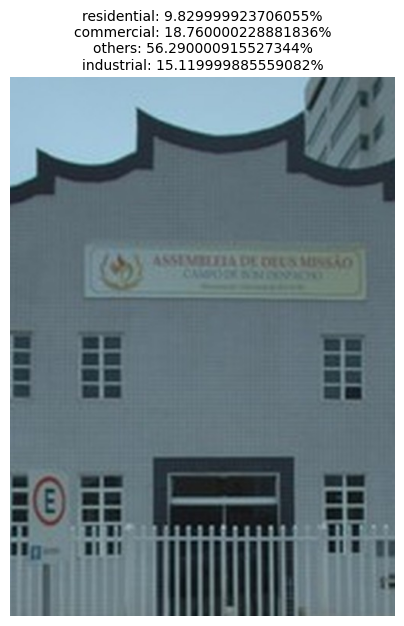

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# Função para calcular as porcentagens das predições e exibir as imagens
def plot_sample_images_with_percentages(prediction_mapping, target_class, num_samples=10):
    sample_predictions = list(prediction_mapping.items())[:num_samples]

    for file_path, prediction in sample_predictions:
        # Ajustar o caminho do arquivo para a categoria "others", se necessário
        if not file_path.startswith(('commercial', 'residential', 'industrial')):
            file_path = 'others/' + file_path

        # Carregar a imagem
        img = Image.open(TEST_IMG_DIR_PATH + '/' + file_path)

        # Calcular as porcentagens para cada classe
        percentages = {cls: round(prob * 100, 2) for cls, prob in zip(classes, prediction[0])}

        # Criar um título com as porcentagens das predições
        title = "\n".join([f"{cls}: {percent}%" for cls, percent in percentages.items()])

        # Exibir a imagem com o título
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=10)
        plt.show()

# Plotando as imagens e suas predições para cada classe
print("Residential Images and Predictions:")
plot_sample_images_with_percentages(residential_prediction_mapping, "residential")

print("Commercial Images and Predictions:")
plot_sample_images_with_percentages(commercial_prediction_mapping, "commercial")

print("Industrial Images and Predictions:")
plot_sample_images_with_percentages(industrial_prediction_mapping, "industrial")

print("Other Images and Predictions:")
plot_sample_images_with_percentages(others_prediction_mapping, "others")


In [ ]:
import pandas as pd

def get_predictions_with_percentages(image_dir, target_class, model, classes):
    prediction_mapping = OrderedDict()

    for file_name in os.listdir(image_dir + '/' + target_class):
        img = Image.open(image_dir + '/' + target_class + '/' + file_name)
        building_image = np.array(ImageOps.fit(img, (INPUT_IMG_WIDTH, INPUT_IMG_HEIGHT), Image.LANCZOS))
        building_image = np.expand_dims(building_image, axis=0)
        prediction = model.predict(building_image)[0]  # Obter o vetor de probabilidades
        percentages = {cls: f"{round(prob * 100, 2)}%" for cls, prob in zip(classes, prediction)}
        prediction_mapping[file_name] = percentages

    return prediction_mapping

# Gera predições para todas as classes
all_predictions = {}
for target_class in classes:
    predictions = get_predictions_with_percentages(TEST_IMG_DIR_PATH, target_class, new_eff_model, classes)
    all_predictions[target_class] = predictions

# Criar uma tabela visual
def create_prediction_table(predictions_dict):
    all_data = []
    for target_class, predictions in predictions_dict.items():
        for file_name, percentages in predictions.items():
            row = {"Image": file_name, "True Class": target_class, **percentages}
            all_data.append(row)
    
    return pd.DataFrame(all_data)

# Cria tabela consolidada
prediction_table = create_prediction_table(all_predictions)

# Salva a tabela em um arquivo Excel
output_path = "prediction_percentages_table.xlsx"
prediction_table.to_excel(output_path, index=False)

print(f"A tabela foi salva em: {output_path}")

# Exibe a tabela diretamente no console
print(prediction_table)

